In [16]:
import os
import joblib 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor

In [8]:
# Load data
data= pd.read_csv("water_quality_dataset_100k_new.csv")

# Basic info
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Index                   100000 non-null  int64  
 1   pH                      97979 non-null   float64
 2   Iron                    99328 non-null   float64
 3   Nitrate                 98204 non-null   float64
 4   Chloride                97045 non-null   float64
 5   Lead                    99571 non-null   float64
 6   Zinc                    97439 non-null   float64
 7   Color                   99901 non-null   object 
 8   Turbidity               99167 non-null   float64
 9   Fluoride                96784 non-null   float64
 10  Copper                  96785 non-null   float64
 11  Odor                    97034 non-null   float64
 12  Sulfate                 96723 non-null   float64
 13  Conductivity            97215 non-null   float64
 14  Chlorine             

In [9]:
data.head()

,Index,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,...,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Month,Day,Time of Day,Target
0,3343584,7.262136,0.002857,5.965704,245.101184,6.679537e-44,0.702867,Faint Yellow,0.014223,0.583591,...,2.835370,8.067879e-03,153.126744,Spring,11.179752,55.340114,August,20.0,17.0,0
1,4332797,6.827967,0.000356,8.650092,261.948686,2.751868e-159,0.205934,Colorless,0.339881,2.214786,...,3.228036,4.245956e-05,260.391845,Ground,12.573723,80.335206,June,26.0,2.0,1
2,2580354,NaN,0.000063,NaN,176.192348,NaN,0.896104,Near Colorless,0.122076,1.566183,...,2.863932,1.646600e-03,131.984171,Reservoir,12.702576,81.535521,January,4.0,16.0,0
3,484305,7.782600,0.051721,3.747001,224.053938,1.513023e-136,0.088500,Colorless,0.209460,0.693032,...,4.195383,5.283502e-11,447.051626,NaN,13.009862,72.845282,May,13.0,1.0,0
4,1026518,7.627800,0.000172,7.988966,89.478315,3.450032e-76,0.402281,Colorless,0.520102,1.130603,...,4.004640,9.799640e-03,395.187898,Ground,17.727374,36.844691,December,25.0,18.0,0


In [10]:
data = data.drop(columns=["Index"])

In [11]:
df=data.copy()

In [12]:
df

,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,Copper,...,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Month,Day,Time of Day,Target
0,7.262136,2.857248e-03,5.965704,245.101184,6.679537e-44,0.702867,Faint Yellow,0.014223,0.583591,0.039819,...,2.835370,8.067879e-03,153.126744,Spring,11.179752,55.340114,August,20.0,17.0,0
1,6.827967,3.555528e-04,8.650092,261.948686,2.751868e-159,0.205934,Colorless,0.339881,2.214786,0.224705,...,3.228036,4.245956e-05,260.391845,Ground,12.573723,80.335206,June,26.0,2.0,1
2,NaN,6.303493e-05,NaN,176.192348,NaN,0.896104,Near Colorless,0.122076,1.566183,0.058934,...,2.863932,1.646600e-03,131.984171,Reservoir,12.702576,81.535521,January,4.0,16.0,0
3,7.782600,5.172140e-02,3.747001,224.053938,1.513023e-136,0.088500,Colorless,0.209460,0.693032,0.393710,...,4.195383,5.283502e-11,447.051626,NaN,13.009862,72.845282,May,13.0,1.0,0
4,7.627800,1.721911e-04,7.988966,89.478315,3.450032e-76,0.402281,Colorless,0.520102,1.130603,0.211742,...,4.004640,9.799640e-03,395.187898,Ground,17.727374,36.844691,December,25.0,18.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,6.878051,4.117124e-07,5.322810,108.110638,8.696207e-159,3.182844,Colorless,0.278222,1.282346,0.759200,...,3.844900,3.612888e-03,490.345588,Lake,9.796617,38.218949,May,21.0,7.0,0
99996,6.234022,1.117469e-01,17.328060,419.511947,3.996521e-146,0.279021,Yellow,0.152766,1.119400,1.501363,...,2.896578,3.589283e-03,355.272379,Well,15.855275,63.903902,March,18.0,12.0,0
99997,7.861995,3.820164e-05,4.304552,215.233572,2.909526e-124,0.009500,Near Colorless,0.027866,0.093040,0.277302,...,2.131950,1.754100e-03,337.180755,River,37.648185,72.763230,May,15.0,12.0,0
99998,7.865141,4.720492e-02,1.782478,192.690548,8.000041e-221,0.303846,Colorless,0.004299,0.423846,0.538210,...,NaN,1.972004e-02,307.239395,Stream,7.719304,46.404757,December,22.0,17.0,0


In [13]:
df["Target"].value_counts()

Target
0    69694
1    30306
Name: count, dtype: int64

In [14]:
target_counts = df["Target"].value_counts()

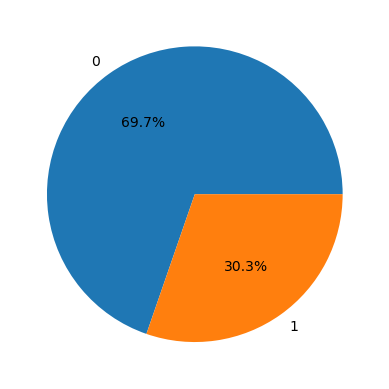

In [17]:
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%')
plt.show()

In [18]:
#saparate numarical values
num_features = df.select_dtypes(include=[np.number]).columns.tolist()
num_features.remove("Target")
num_features

['pH',
 'Iron',
 'Nitrate',
 'Chloride',
 'Lead',
 'Zinc',
 'Turbidity',
 'Fluoride',
 'Copper',
 'Odor',
 'Sulfate',
 'Conductivity',
 'Chlorine',
 'Manganese',
 'Total Dissolved Solids',
 'Water Temperature',
 'Air Temperature',
 'Day',
 'Time of Day']

In [20]:
#saparate categorical features
cat_features = df.select_dtypes(include=[object]).columns.tolist()

cat_features

['Color', 'Source', 'Month']

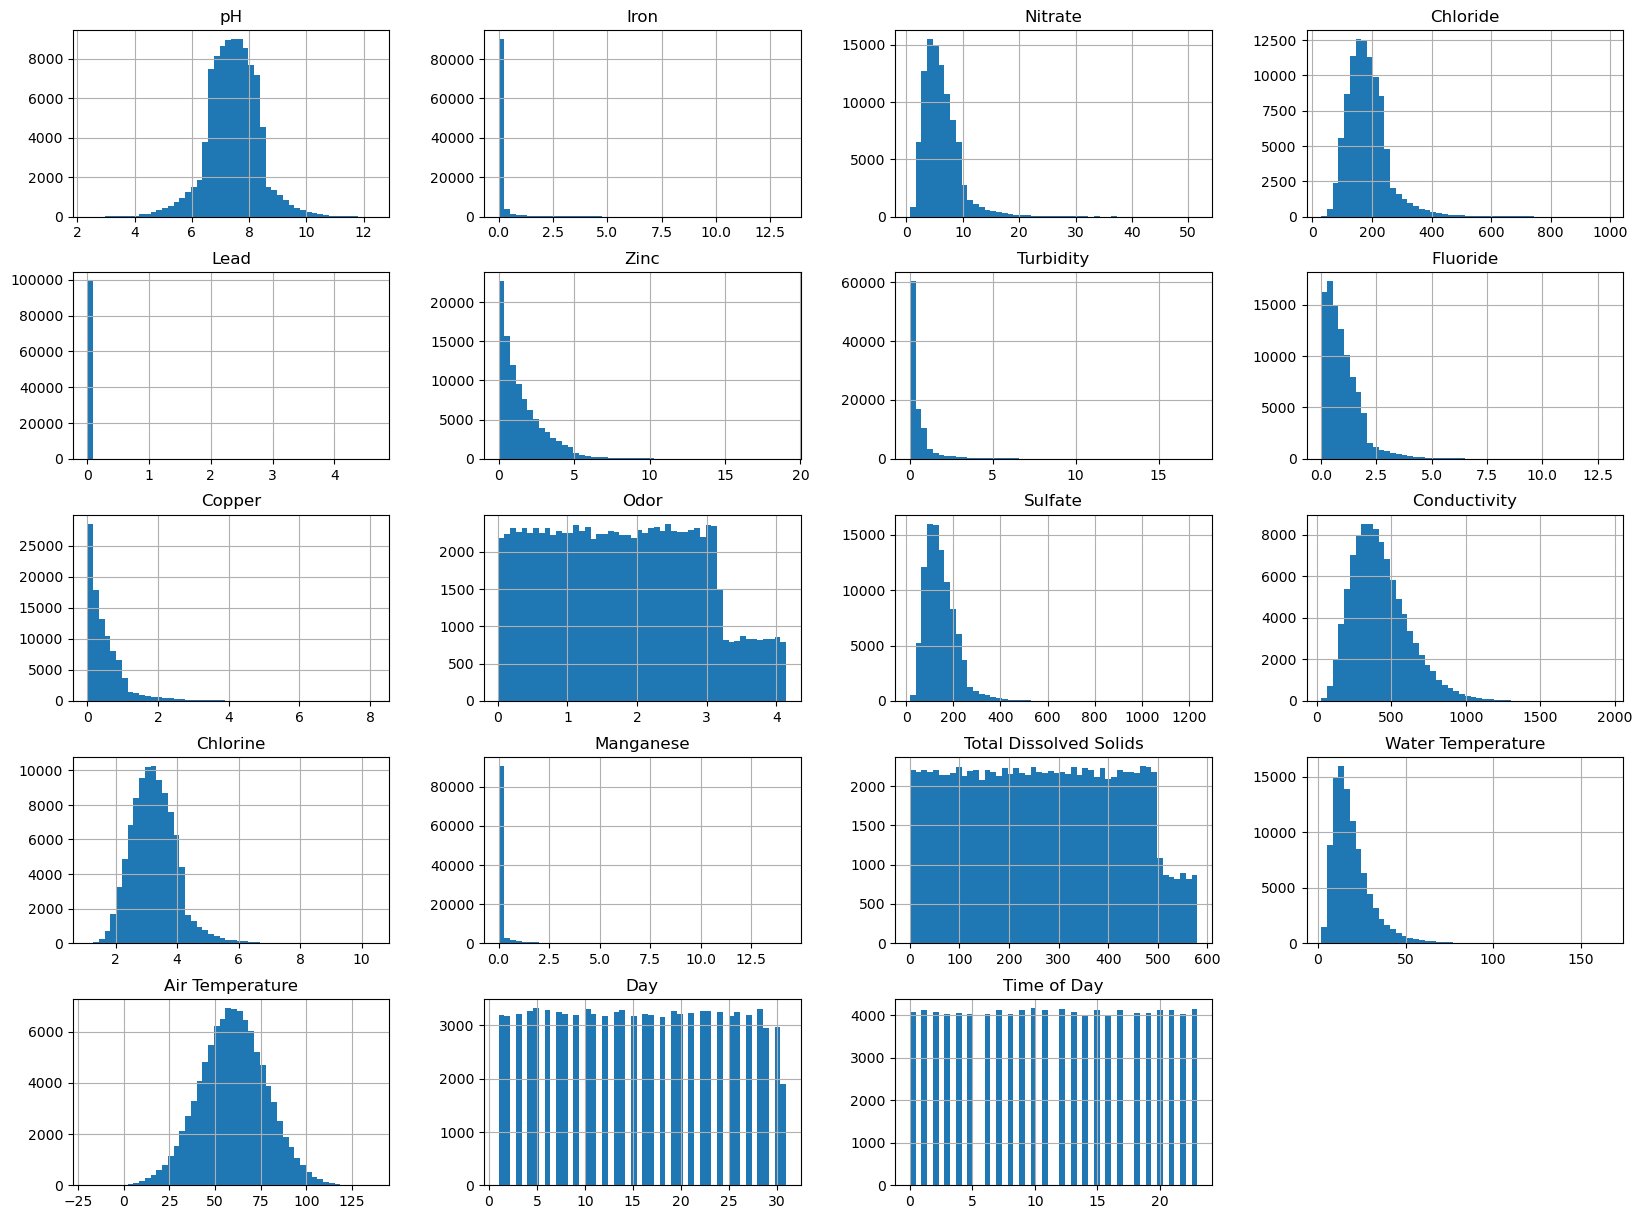

In [21]:
#write /plot histogram for numarical feature
df[num_features].hist(bins=50, figsize=(20,15))
plt.show()

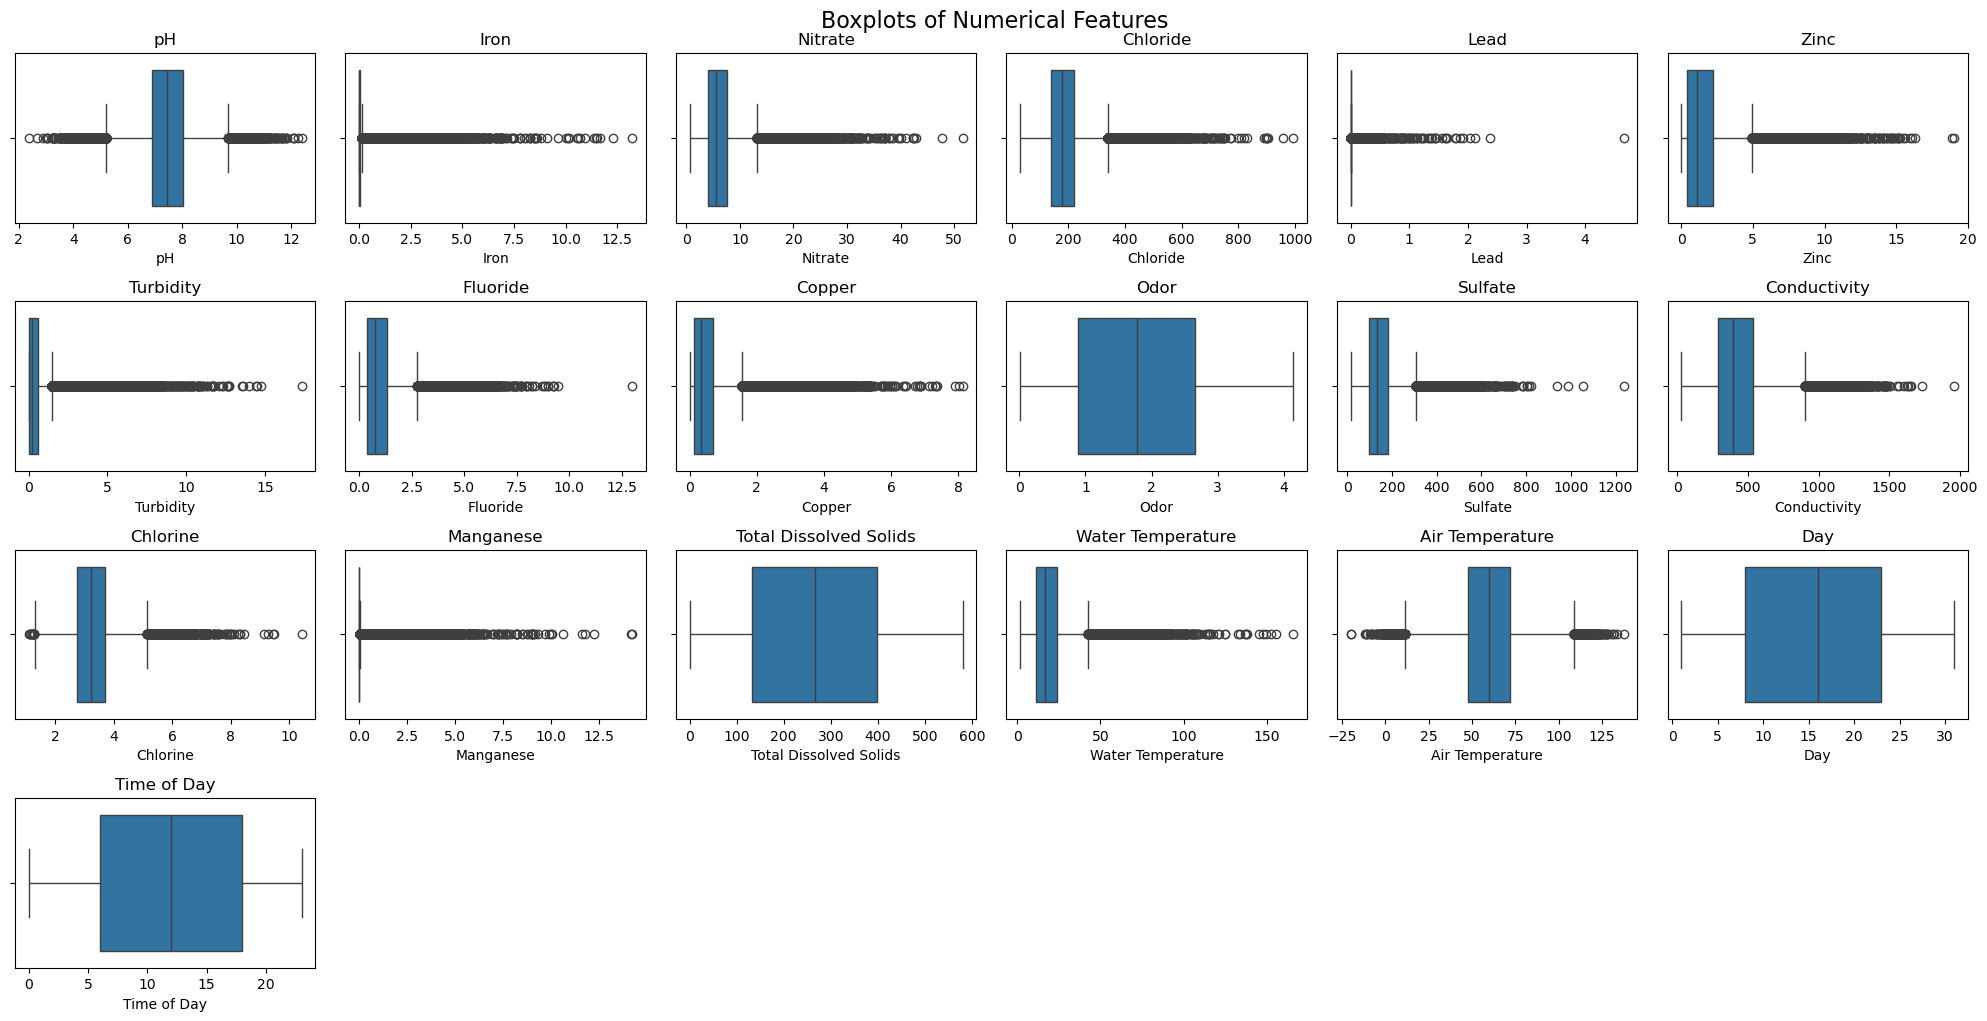

In [26]:
#box plt
plt.figure(figsize=(20,15))
for i, column in enumerate(df[num_features]):
    plt.subplot(6, 6, i + 1)
    sns.boxplot(data=df[num_features], x=column)
    plt.title(column)
plt.suptitle("Boxplots of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()

<Figure size 1000x400 with 0 Axes>

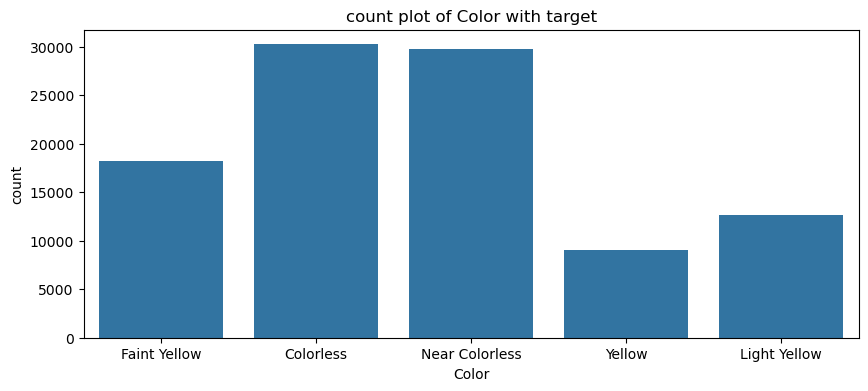

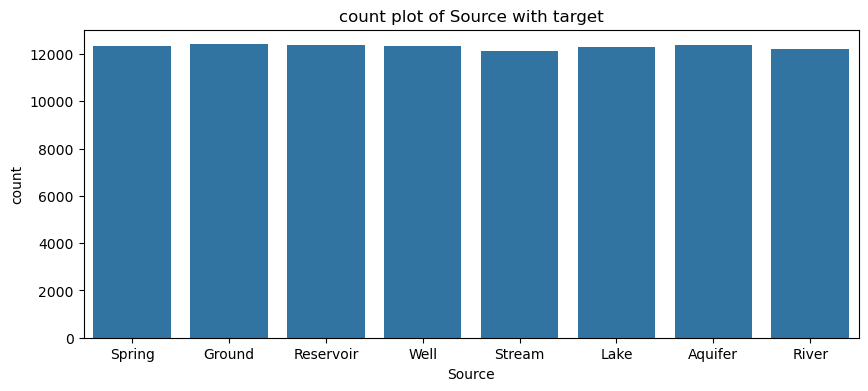

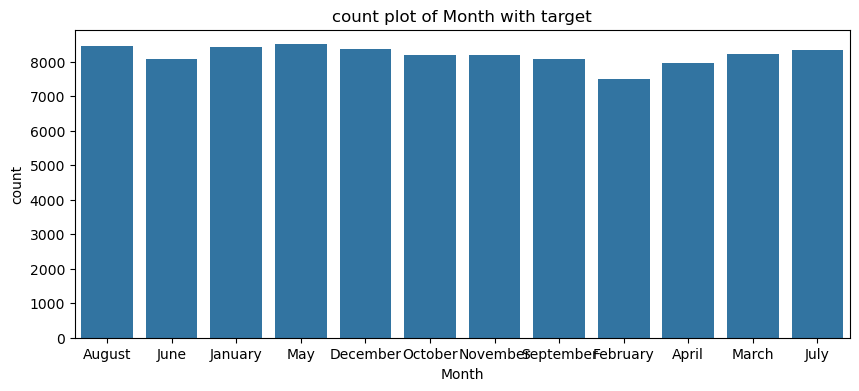

In [31]:
#categorical plt
plt.figure(figsize=(10,4))
for column in cat_features:
    plt.figure(figsize=(10,4))
    sns.countplot(data=df, x=column)
    plt.title(f"count plot of {column} with target")
    plt.show()

Correlation matrix of num features:


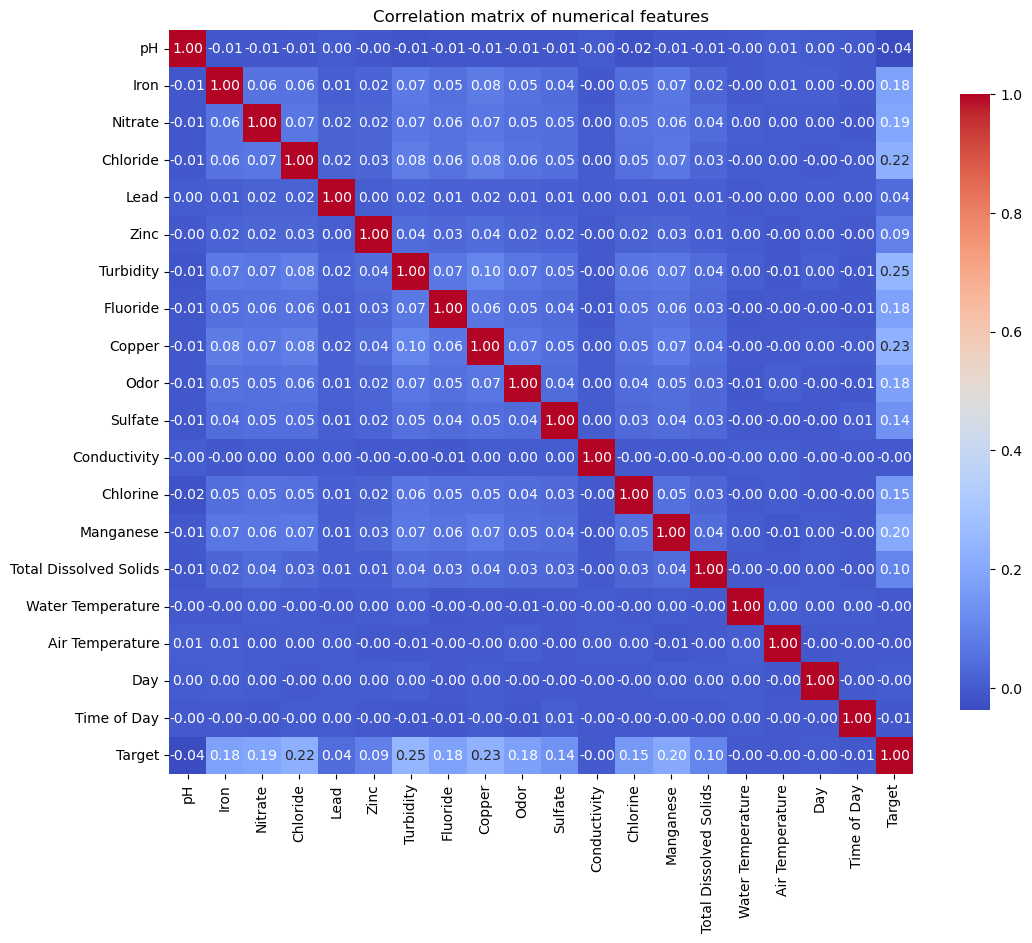

In [32]:
print("Correlation matrix of num features:")
plt.figure(figsize=(12,10))
corr_matrix = df[num_features+["Target"]].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.title("Correlation matrix of numerical features")
plt.show()

In [35]:
#data clean
df.isna().sum()



pH                        2021
Iron                       672
Nitrate                   1796
Chloride                  2955
Lead                       429
Zinc                      2561
Color                       99
Turbidity                  833
Fluoride                  3216
Copper                    3215
Odor                      2966
Sulfate                   3277
Conductivity              2785
Chlorine                  1008
Manganese                 1830
Total Dissolved Solids      39
Source                    1529
Water Temperature         2810
Air Temperature            479
Month                     1623
Day                       1691
Time of Day               1936
Target                       0
dtype: int64

In [36]:
df.shape

(100000, 23)

In [37]:
missing = df.isna().sum(axis=1)/df.shape[1]*100
missing.value_counts()

0.000000     66901
4.347826     27159
8.695652      5264
13.043478      623
17.391304       51
21.739130        2
Name: count, dtype: int64

In [38]:
#detect the missing value
missing_value = df.isnull().sum()
missing_value

pH                        2021
Iron                       672
Nitrate                   1796
Chloride                  2955
Lead                       429
Zinc                      2561
Color                       99
Turbidity                  833
Fluoride                  3216
Copper                    3215
Odor                      2966
Sulfate                   3277
Conductivity              2785
Chlorine                  1008
Manganese                 1830
Total Dissolved Solids      39
Source                    1529
Water Temperature         2810
Air Temperature            479
Month                     1623
Day                       1691
Time of Day               1936
Target                       0
dtype: int64

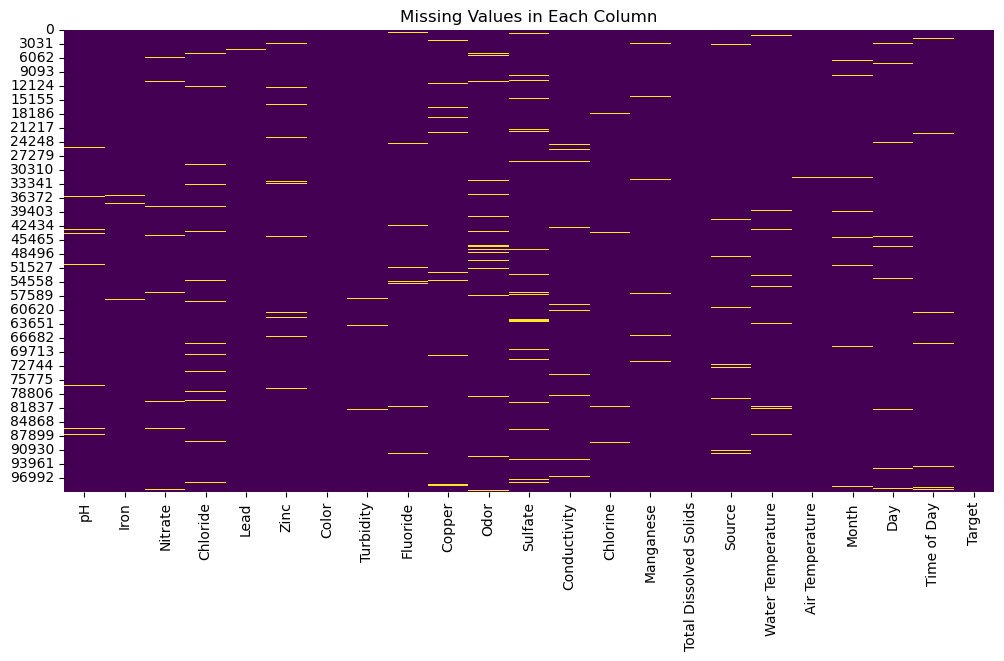

In [39]:
#visualize missing value
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Each Column')

plt.show()

In [40]:
missing_value = missing_value[missing_value > 0]
print(missing_value)
df.dropna()

pH                        2021
Iron                       672
Nitrate                   1796
Chloride                  2955
Lead                       429
Zinc                      2561
Color                       99
Turbidity                  833
Fluoride                  3216
Copper                    3215
Odor                      2966
Sulfate                   3277
Conductivity              2785
Chlorine                  1008
Manganese                 1830
Total Dissolved Solids      39
Source                    1529
Water Temperature         2810
Air Temperature            479
Month                     1623
Day                       1691
Time of Day               1936
dtype: int64


,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,Copper,...,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Month,Day,Time of Day,Target
0,7.262136,2.857248e-03,5.965704,245.101184,6.679537e-44,0.702867,Faint Yellow,0.014223,0.583591,0.039819,...,2.835370,8.067879e-03,153.126744,Spring,11.179752,55.340114,August,20.0,17.0,0
1,6.827967,3.555528e-04,8.650092,261.948686,2.751868e-159,0.205934,Colorless,0.339881,2.214786,0.224705,...,3.228036,4.245956e-05,260.391845,Ground,12.573723,80.335206,June,26.0,2.0,1
4,7.627800,1.721911e-04,7.988966,89.478315,3.450032e-76,0.402281,Colorless,0.520102,1.130603,0.211742,...,4.004640,9.799640e-03,395.187898,Ground,17.727374,36.844691,December,25.0,18.0,0
5,7.438374,1.023030e-01,6.891186,157.967041,1.198280e-42,0.185183,Yellow,0.000966,1.143355,1.195115,...,4.520820,2.810500e-02,217.500492,Well,6.706531,53.995611,August,20.0,10.0,1
6,7.945263,1.616232e-01,3.082807,191.561335,7.278161e-05,1.808817,Colorless,0.263444,1.765077,0.405573,...,3.615394,6.839616e-11,104.196529,Reservoir,9.201807,33.332203,October,22.0,23.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,6.463093,6.854987e-04,3.980943,301.672995,5.272680e-317,1.355574,Colorless,0.695195,2.287507,0.314559,...,4.140258,3.315744e-04,477.095920,Lake,15.928996,31.335848,August,22.0,3.0,1
99995,6.878051,4.117124e-07,5.322810,108.110638,8.696207e-159,3.182844,Colorless,0.278222,1.282346,0.759200,...,3.844900,3.612888e-03,490.345588,Lake,9.796617,38.218949,May,21.0,7.0,0
99996,6.234022,1.117469e-01,17.328060,419.511947,3.996521e-146,0.279021,Yellow,0.152766,1.119400,1.501363,...,2.896578,3.589283e-03,355.272379,Well,15.855275,63.903902,March,18.0,12.0,0
99997,7.861995,3.820164e-05,4.304552,215.233572,2.909526e-124,0.009500,Near Colorless,0.027866,0.093040,0.277302,...,2.131950,1.754100e-03,337.180755,River,37.648185,72.763230,May,15.0,12.0,0


In [42]:
df.isna().sum().sort_values()

Target                       0
Total Dissolved Solids      39
Color                       99
Lead                       429
Air Temperature            479
Iron                       672
Turbidity                  833
Chlorine                  1008
Source                    1529
Month                     1623
Day                       1691
Nitrate                   1796
Manganese                 1830
Time of Day               1936
pH                        2021
Zinc                      2561
Conductivity              2785
Water Temperature         2810
Chloride                  2955
Odor                      2966
Copper                    3215
Fluoride                  3216
Sulfate                   3277
dtype: int64

In [ ]:
#impute missing values for numerical features with the mean
num_features = df.select_dtypes(include=[np.number]).columns.tolist()
df[num_features] = df[num_features].fillna(df[num_features].mean())
#verifying if missing value is imputed
print(df.isna().sum().sort_values())

pH                           0
Day                          0
Air Temperature              0
Water Temperature            0
Total Dissolved Solids       0
Manganese                    0
Chlorine                     0
Conductivity                 0
Time of Day                  0
Odor                         0
Sulfate                      0
Fluoride                     0
Turbidity                    0
Zinc                         0
Lead                         0
Chloride                     0
Nitrate                      0
Iron                         0
Copper                       0
Target                       0
Color                       99
Source                    1529
Month                     1623
dtype: int64


In [45]:
#impute missing values for categorical features with the mode
cat_features = df.select_dtypes(include=[object]).columns.tolist()
df[cat_features] = df[cat_features].fillna(df[cat_features].mode().iloc[0])
#verifying if missing value is imputed
print(df.isna().sum())

pH                        0
Iron                      0
Nitrate                   0
Chloride                  0
Lead                      0
Zinc                      0
Color                     0
Turbidity                 0
Fluoride                  0
Copper                    0
Odor                      0
Sulfate                   0
Conductivity              0
Chlorine                  0
Manganese                 0
Total Dissolved Solids    0
Source                    0
Water Temperature         0
Air Temperature           0
Month                     0
Day                       0
Time of Day               0
Target                    0
dtype: int64


In [46]:
#convert categorical data into numerical
num_features = df.select_dtypes(include=['int64','float64']).columns.tolist()
cat_features=df.select_dtypes(include=['object','category']).columns.tolist()

In [49]:
#exclude the target and non feature columns if present
non_feature_cols = ['Target','Month','Day','Time of Day',]
num_features = [col for col in num_features if col not in non_feature_cols]
cat_features = [col for col in cat_features if col not in non_feature_cols]
cat_features

['Color', 'Source']

In [50]:
#normalize of standerize numerical features
numerical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])
#convert categorical features
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])
#combain transformer into a preprocessor
preprocessor = ColumnTransformer(transformers=[
    ("num", numerical_transformer, num_features),
    ("cat", categorical_transformer, cat_features)
])
#apply the transformations to the dataframe
df_preprocessed = preprocessor.fit_transform(df)
#which sahpe of transform data
print("Shape of preprocessed data:", df_preprocessed.shape)

Shape of preprocessed data: (100000, 30)


In [51]:
df_preprocessed


array([[-2.12941916e-01, -2.63769430e-01, -5.89469676e-02, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-7.04941749e-01, -2.69061682e-01,  7.78111007e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.00648306e-15, -2.69680493e-01, -5.53911544e-16, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 4.66818009e-01, -2.69733027e-01, -5.76934988e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 4.70383328e-01, -1.69953452e-01, -1.36337934e+00, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 1.29183759e+00, -2.69143519e-01, -5.55411292e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [52]:
#get feature names
numerical_features = num_features
categorical_features = preprocessor.named_transformers_["cat"]["onehot"].get_feature_names_out(cat_features)
all_features = numerical_features + list(categorical_features)
print(all_features)

['pH', 'Iron', 'Nitrate', 'Chloride', 'Lead', 'Zinc', 'Turbidity', 'Fluoride', 'Copper', 'Odor', 'Sulfate', 'Conductivity', 'Chlorine', 'Manganese', 'Total Dissolved Solids', 'Water Temperature', 'Air Temperature', 'Color_Colorless', 'Color_Faint Yellow', 'Color_Light Yellow', 'Color_Near Colorless', 'Color_Yellow', 'Source_Aquifer', 'Source_Ground', 'Source_Lake', 'Source_Reservoir', 'Source_River', 'Source_Spring', 'Source_Stream', 'Source_Well']


In [53]:
#convert data frame
df_preprocessed = pd.DataFrame(df_preprocessed,columns=all_features)
df_preprocessed[non_feature_cols]=df[non_feature_cols].reset_index(drop=True)
df_preprocessed

,pH,Iron,Nitrate,Chloride,Lead,Zinc,Turbidity,Fluoride,Copper,Odor,...,Source_Lake,Source_Reservoir,Source_River,Source_Spring,Source_Stream,Source_Well,Target,Month,Day,Time of Day
0,-2.129419e-01,-0.263769,-5.894697e-02,0.904251,-4.700078e-02,-0.557041,-0.552455,-0.471897,-0.817865,0.300521,...,0.0,0.0,0.0,1.0,0.0,0.0,0,August,20.0,17.0
1,-7.049417e-01,-0.269062,7.781110e-01,1.154626,-4.700078e-02,-0.882522,-0.193293,1.553228,-0.500143,-1.152711,...,0.0,0.0,0.0,0.0,0.0,0.0,1,June,26.0,2.0
2,-1.006483e-15,-0.269680,-5.539115e-16,-0.119819,2.316940e-17,-0.430475,-0.433506,0.747989,-0.785016,-1.380320,...,0.0,1.0,0.0,0.0,0.0,0.0,0,January,4.0,16.0
3,3.768477e-01,-0.160399,-7.507927e-01,0.591463,-4.700078e-02,-0.959440,-0.337132,-0.336026,-0.209712,0.762314,...,0.0,0.0,0.0,0.0,0.0,0.0,0,May,13.0,1.0
4,2.014284e-01,-0.269450,5.719556e-01,-1.408496,-4.700078e-02,-0.753919,0.005470,0.207218,-0.522419,-0.428927,...,0.0,0.0,0.0,0.0,0.0,0.0,0,December,25.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,-6.481864e-01,-0.269813,-2.594171e-01,-1.131597,-4.700078e-02,1.067294,-0.261296,0.395606,0.418374,-1.685106,...,1.0,0.0,0.0,0.0,0.0,0.0,0,May,21.0,7.0
99996,-1.378000e+00,-0.033417,3.484114e+00,3.496210,-4.700078e-02,-0.834652,-0.399658,0.193309,1.693765,0.655452,...,0.0,0.0,0.0,0.0,0.0,1.0,0,March,18.0,12.0
99997,4.668180e-01,-0.269733,-5.769350e-01,0.460382,-4.700078e-02,-1.011183,-0.537408,-1.080915,-0.409757,1.253748,...,0.0,0.0,1.0,0.0,0.0,0.0,0,May,15.0,12.0
99998,4.703833e-01,-0.169953,-1.363379e+00,0.125365,-4.700078e-02,-0.818392,-0.563400,-0.670220,0.038609,0.485563,...,0.0,0.0,0.0,0.0,1.0,0.0,0,December,22.0,17.0


In [54]:
df_preprocessed.to_csv("water_quality_dataset_100k_preprocessed.csv", index=False)

In [56]:
#features Engineering
df=pd.read_csv("water_quality_dataset_100k_preprocessed.csv")

In [57]:
df

,pH,Iron,Nitrate,Chloride,Lead,Zinc,Turbidity,Fluoride,Copper,Odor,...,Source_Lake,Source_Reservoir,Source_River,Source_Spring,Source_Stream,Source_Well,Target,Month,Day,Time of Day
0,-2.129419e-01,-0.263769,-5.894697e-02,0.904251,-4.700078e-02,-0.557041,-0.552455,-0.471897,-0.817865,0.300521,...,0.0,0.0,0.0,1.0,0.0,0.0,0,August,20.0,17.0
1,-7.049417e-01,-0.269062,7.781110e-01,1.154626,-4.700078e-02,-0.882522,-0.193293,1.553228,-0.500143,-1.152711,...,0.0,0.0,0.0,0.0,0.0,0.0,1,June,26.0,2.0
2,-1.006483e-15,-0.269680,-5.539115e-16,-0.119819,2.316940e-17,-0.430475,-0.433506,0.747989,-0.785016,-1.380320,...,0.0,1.0,0.0,0.0,0.0,0.0,0,January,4.0,16.0
3,3.768477e-01,-0.160399,-7.507927e-01,0.591463,-4.700078e-02,-0.959440,-0.337132,-0.336026,-0.209712,0.762314,...,0.0,0.0,0.0,0.0,0.0,0.0,0,May,13.0,1.0
4,2.014284e-01,-0.269450,5.719556e-01,-1.408496,-4.700078e-02,-0.753919,0.005470,0.207218,-0.522419,-0.428927,...,0.0,0.0,0.0,0.0,0.0,0.0,0,December,25.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,-6.481864e-01,-0.269813,-2.594171e-01,-1.131597,-4.700078e-02,1.067294,-0.261296,0.395606,0.418374,-1.685106,...,1.0,0.0,0.0,0.0,0.0,0.0,0,May,21.0,7.0
99996,-1.378000e+00,-0.033417,3.484114e+00,3.496210,-4.700078e-02,-0.834652,-0.399658,0.193309,1.693765,0.655452,...,0.0,0.0,0.0,0.0,0.0,1.0,0,March,18.0,12.0
99997,4.668180e-01,-0.269733,-5.769350e-01,0.460382,-4.700078e-02,-1.011183,-0.537408,-1.080915,-0.409757,1.253748,...,0.0,0.0,1.0,0.0,0.0,0.0,0,May,15.0,12.0
99998,4.703833e-01,-0.169953,-1.363379e+00,0.125365,-4.700078e-02,-0.818392,-0.563400,-0.670220,0.038609,0.485563,...,0.0,0.0,0.0,0.0,1.0,0.0,0,December,22.0,17.0
